In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [37]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

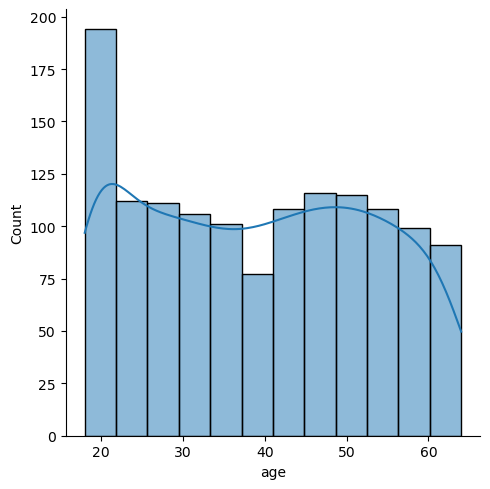

In [42]:
sns.displot(df['age'], kde= True)

<Axes: xlabel='sex', ylabel='count'>

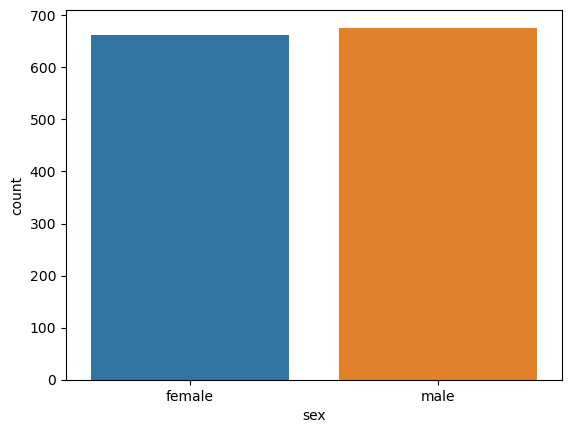

In [43]:
sns.countplot(df,x='sex')

<Axes: xlabel='sex', ylabel='age'>

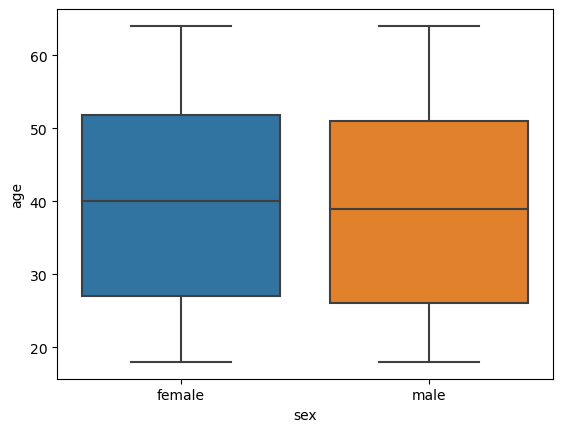

In [44]:
sns.boxplot(df,y='age',x='sex')

In [45]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

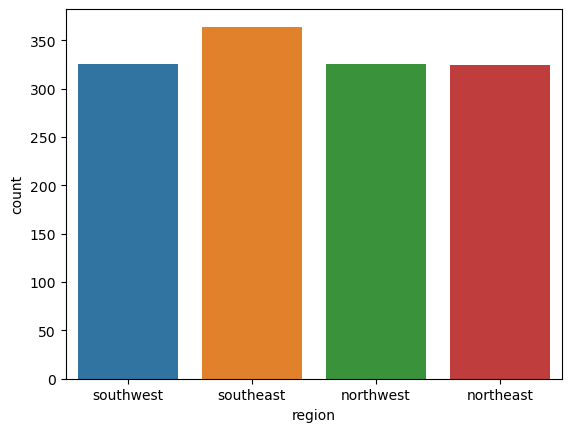

In [46]:
sns.countplot(df,x='region')

In [47]:
df.replace({'sex':{'male':0,'female':1}}, inplace= True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [48]:
df.replace({'smoker':{'yes':0,'no':1}}, inplace= True)

In [49]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [50]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace= True)

In [51]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [52]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [53]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
x_train, x_test, y_train, y_test

(      age  sex     bmi  children  smoker  region
 560    46    1  19.950         2       1       3
 1285   47    1  24.320         0       1       2
 1142   52    1  24.860         0       1       0
 969    39    1  34.320         5       1       0
 486    54    1  21.470         3       1       3
 ...   ...  ...     ...       ...     ...     ...
 1095   18    1  31.350         4       1       2
 1130   39    1  23.870         5       1       0
 1294   58    0  25.175         0       1       2
 860    37    1  47.600         2       0       1
 1126   55    0  29.900         0       1       1
 
 [1070 rows x 6 columns],
       age  sex     bmi  children  smoker  region
 764    45    1  25.175         2       1       2
 887    36    1  30.020         0       1       3
 890    64    1  26.885         0       0       3
 1293   46    0  25.745         3       1       3
 259    19    0  31.920         0       0       3
 ...   ...  ...     ...       ...     ...     ...
 109    63    0  35.09

In [56]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [57]:
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
y_pred = rf_regressor.predict(x_test)

In [59]:
ms
e = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 20605006.150018733


In [61]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.8672774588750145